In [34]:
import numpy as np

In [35]:
# pour ecrire un complexe, on utilise la lettre j
print(1j**2)
c= 1+1j
print(c)
print(c**2)

(-1+0j)
(1+1j)
2j


## Question 1:

In [7]:
def f1(a,c,n):
    res = a
    _z = lambda z: z ** 2 + c
    for _ in range(n): res = _z(res)
    return res

## Question 2.a

Ecrire la réponse ici, en justifiant (en Markdown). 

$K_0 = \{z_n = a^{2^n}, n \in \mathbb{N}\}$

## Question 2.b

Ecrire la réponse ici, en justifiant (en Markdown). 

In [8]:
import sympy as sp
a, c = sp.symbols('a, c')
sp.init_printing()
eq = a**2+c - a
result = sp.solve(a**2+c - a, a)
result

D'ou, on peut deduire que $\left[\frac{1}{2}-\frac{\sqrt{1-4 c}}{2}, \frac{\sqrt{1-4 c}}{2}+\frac{1}{2}\right]$ sont des solution de l'equation $a^2 - a + c = 0$, pour que $z_n$ soit constante.

## Question 2.c

Ecrire la réponse ici, en justifiant (en Markdown). 

Bien sur quand $a \in \mathbb{R}, c \geq \frac{1}{4}$ on a $z_n \in \mathbb{R}$

In [5]:
# import sympy as sp
# a, c, n = sp.symbols('a c n')
# z = sp.symbols('z')
# sp.init_printing()
# lst = []

# for _ in range(10):
#     z = f1(n=_, a=a, c=c)
#     lst.append(z)

# # import matplotlib.pyplot as plt
# # plt.plot(lst)
# # plt.show()
# # lst

[1, 2, 3]


On montre par recurrence, que $z_n \in \mathbb{R}$ pour tout $n \in \mathbb{N}$

En effet: $z_{n+1} = z_{n}^{2} + c > \frac{1}{4}$ c'est-a-dire $z_{n} > 0$

$z_{n+1} - z_{n} = z_{n}^2 - z_{n-1}^2 = (z_{n} - z_{n-1}) (z_{n} + z_{n-1})$

avec $(z_{n} + z_{n-1}) > 0$

Initialization: $z_{1}- z_{0} = a^2 - a + c \leq c - \frac{1}{4} > 0$ 

Heredite: soit pour $n \in \mathbb{N}$ tel que $z_{n}- z_{n-1} > 0$ alors $z_{n+1}- z_{n} = (z_{n} - z_{n-1}) (z_{n} + z_{n-1}) > 0$

Conclusion: $z_{n}- z_{n-1} > 0$ pour tout $n \in \mathbb{N}$

## Question 3

Ecrire la réponse ici, en justifiant (en Markdown). 

Method 1:

$f_1^{'}(x) = 2 x > 0,  pour \ x>0$

s'il existe $n_{0} \in \mathbb{N}$ tel que $\left|z_{n_{0}}\right| \geq|c|+1$, 

alors, $f_1^{'}(x) = 2 x > 1$ 

alors la suite n'est pas contractnate d'ou n'est pas bornee.

Method 2:

On veut montrer par contradiction que $z_n$ n'est pas bornée quand $\left|z_{n}\right|<|c|+1$.

Supposons que $z_n$ est bornée

Alors il existe $M \in \mathbb{R}_{+}^{*}$ pour que:

$\forall 0 < \epsilon \leq M, \exists N \in \mathbb{N}$ pour tout $n > N$, tel que $M - \epsilon < |z_n| < M$ 

On veut ensuite montre que $M > |c| + 1$.

c'est-a-dire $M > 1, M ^2 > M$

Alors on a $M - \epsilon > |c| + 1 - \epsilon > |c|$

On a $|z_{n+1}| = |z_{n}^2 + c| \geq |z_{n}^2| - |c| \geq (M - \epsilon)^2 - |c| > M - |c| > |c|$

......

## Question 4.a

In [6]:
def suite(a,c,n):
    ell=[a]
    for _ in range(1,n+1): ell.append(f1(n=_, a=a, c=c))
    return(ell)

## Question 4.b

In [19]:
def Julia(a,c,n):
    y=a
    b=True
    k=0
    M=abs(c)+1
    
    while b or (k > n):
        y = f1(n=k, a=y, c=c)
        b = abs(y) - M <= 0 
        k += 1

    return(k)


## Question 4.c

In [17]:
import numpy as np
def image(c):
    tableau = np.zeros((401,401))
    x, y = np.arange(-200,201).reshape(-1,1)/100, np.arange(-200,201).reshape(-1,1)/100
    a = lambda x,y : x + y* 1j
    for i in range(tableau.shape[0]): 
        for j in range(tableau.shape[1]):
            tableau[i,j] = Julia(a=a(x[j, :], y[j, :]), c=c, n=200)
    return tableau

## Question 4.d

In [22]:
c = -0.8+0.156j

tableau = image(c)
tableau
# a little slow so i rewrite another efficient code.

KeyboardInterrupt: 

## Question 4.e

In [10]:
import matplotlib.pyplot as plt

In [21]:
A = image(-0.8+0.156j)

plt.figure(figsize=(25,25))
plt.imshow(A)
plt.colorbar()
plt.show()

# a little slow so i rewrite another efficient code.

C:\Users\Apollo\AppData\Local\Temp\ipykernel_30452\968892290.py:3: RuntimeWarning: overflow encountered in square
  _z = lambda z: z ** 2 + c
C:\Users\Apollo\AppData\Local\Temp\ipykernel_30452\968892290.py:3: RuntimeWarning: invalid value encountered in square
  _z = lambda z: z ** 2 + c


KeyboardInterrupt: 

In [33]:
# A cause de la computation complexite. On symplifier le code comme desous: 
# complexity from O(n^2) to O(n)


def Julia_apolloid(a,c,n):
    y=a
    M=abs(c)+1
    
    for k in range(1, n):
        y = y ** 2 + c
        if abs(y) - M > 0:
            return k-1
        else:
            pass
    return n

def image_apolloid(c):
    tableau = np.zeros((401,401))
    x, y = np.arange(-200,201).reshape(-1,1)/100, np.arange(-200,201).reshape(-1,1)/100
    a = lambda x,y : x + y* 1j
    for i in range(tableau.shape[0]): 
        for j in range(tableau.shape[1]):
            tableau[i,j] = Julia_apolloid(a=a(x[j, :], y[j, :]), c=c, n=200)
    return tableau

In [34]:
c = -0.8+0.156j

tableau = image_apolloid(c)
tableau

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

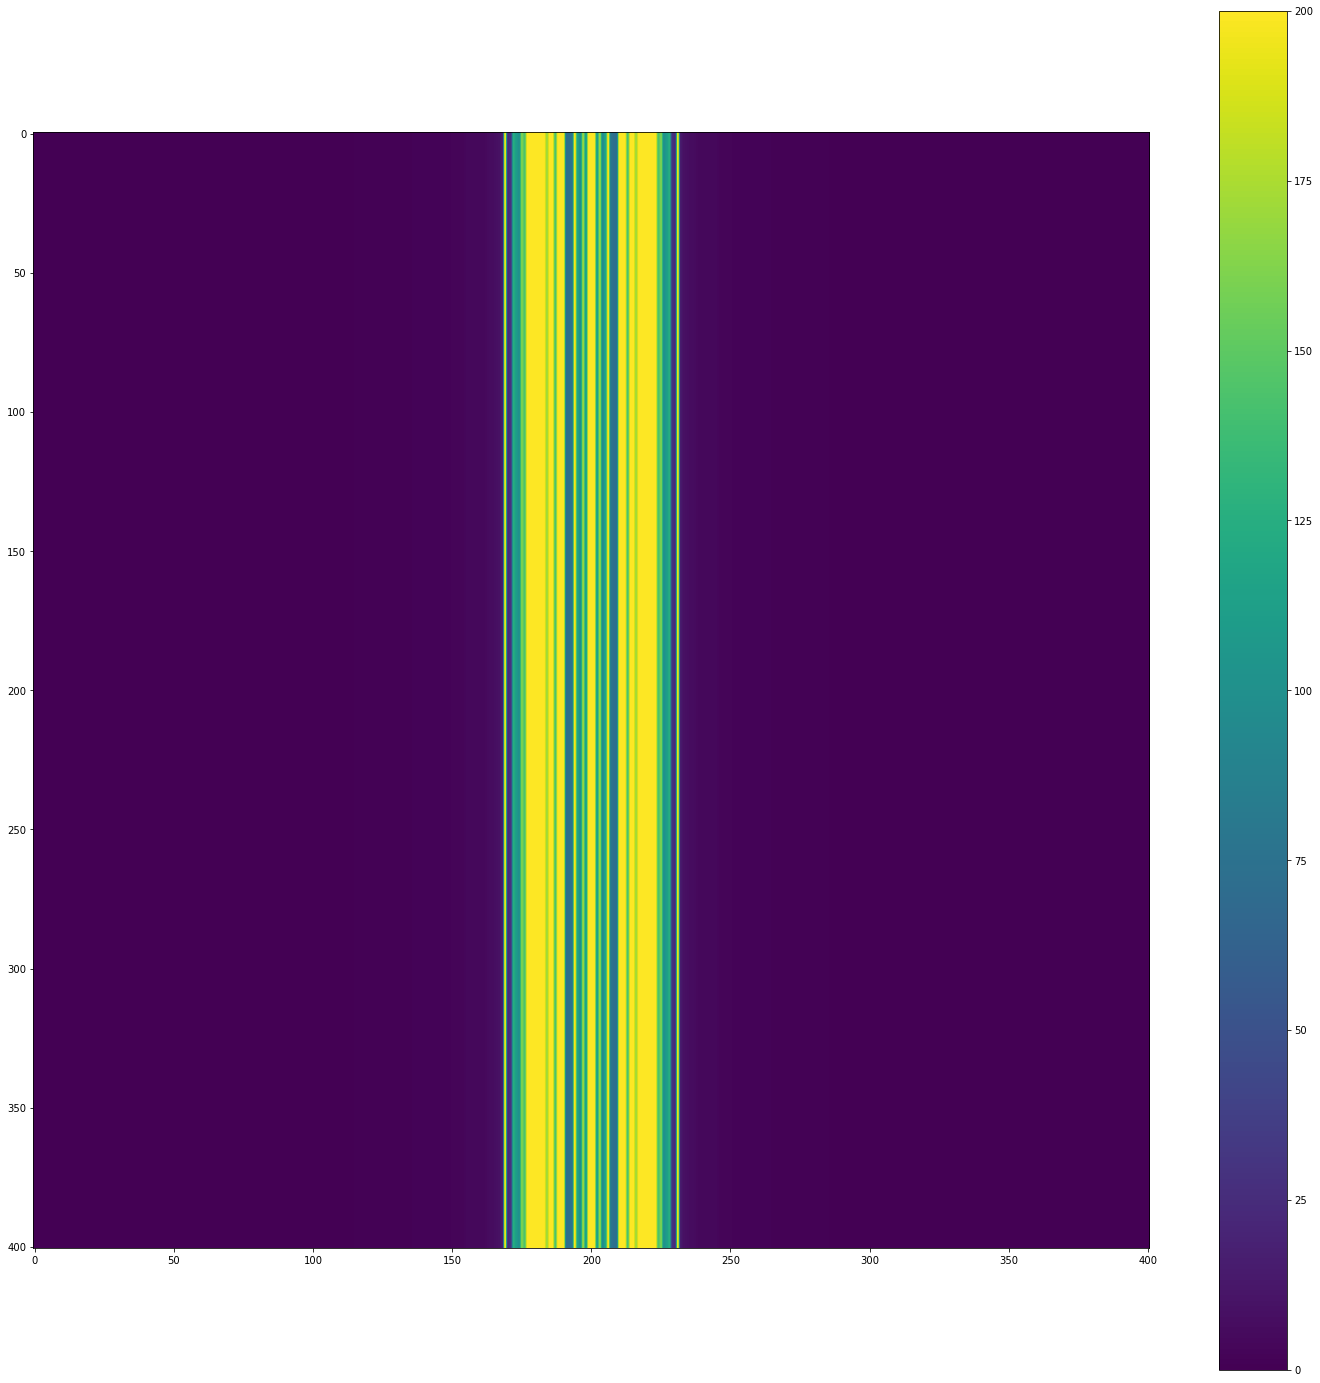

In [36]:
import matplotlib.pyplot as plt
A = image_apolloid(-0.8+0.156j)

plt.figure(figsize=(25,25))
plt.imshow(A)
plt.colorbar()
plt.show()